In [1]:
import os
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x):
    return 3*x**2 - 4*x + 5

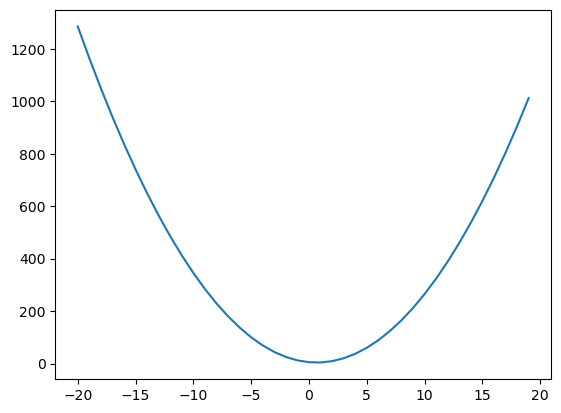

In [4]:
arr = np.arange(-20, 20, 1)
plt.plot(arr, f(arr))

In [5]:
h = 0.00000001
x = 2
(f(x+h) - f(x))/h

7.999999951380232

In [6]:
# bit more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [7]:
# derivative of d w.r.t a, b and c

h = 0.0001

# input values 
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b+=h
d2 = a*b + c

print(f"{d1=}\n{d2=}")
print(f"{(d2 - d1)/h=}")

d1=4.0
d2=4.0002
(d2 - d1)/h=2.0000000000042206


In [43]:
# creating a value object - data structure to store the derivatives
class Value:
    def __init__(self, data, _children = (), _op='', label = ''):
        self.data = data
        self.grad = 0.0
        self._prev = set(_children)
        self._op = _op
        self.label = label
    
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+", )
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out

    
a = Value(2.0, label='a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label='c')
e = a*b;e.label = 'e'
d = e + c;d.label = 'd'
f = Value(-2.0, label='f')
L = d * f;L.label = 'L'
# print(d)
# print(d._prev) # d was produced by the a*b and c
# print(d._op) # d was produced by the addition of a*b and c
L


Value(data=-8.0)

In [44]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in the graph 
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format = 'svg', graph_attr={'rankdir': 'LR'})

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name = uid, label = f"{n.label} | data {n.data:.4f} | grad {n.grad:.4f} ", shape = "record")
        if n._op:
            dot.node(name = uid + n._op, label = n._op)
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

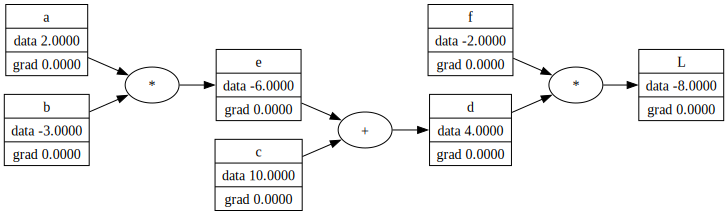

In [45]:
draw_dot(L)